# Wines
Wine has been produced for thousands of years.Different varieties of grapes and strains of yeasts produce different styles of wine.Wine has long played an important role in religion. Red wine was associated with blood by the ancient Egyptians.Regulations govern the classification and sale of wine in many regions of the world.

In [1]:
# importing the necessary libraries .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the datasets
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
white_wine.shape

(4898, 12)

In [7]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
red_wine.shape

(1599, 12)

As you can see the columns of both the datasets are same so for accurate analysis we should merge the two datsets.


In [9]:
# First we should set the wines type and then merge.
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [10]:
wines = pd.concat([white_wine,red_wine])

In [11]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [12]:
wines.shape

(6497, 13)

In [13]:
wines.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [14]:
wines.wine_type.unique()

array(['white', 'red'], dtype=object)

This is the Labels column which we will use for predictive analysis (classification).

In [15]:
# Categorising the quality columns into low , medium and high .
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')


In [16]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,low
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,red,medium


In [17]:
# changing the quality_label column in categorial variable using pandas.
wines['quality_label'] = pd.Categorical(wines['quality_label'], 
                                             categories=['low', 'medium', 'high'])

In [18]:
# Reshuffling the dataset for a mixture.
wines = wines.sample(frac=1, random_state=98).reset_index(drop=True)

In [19]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5,red,low
1,7.2,0.160,0.29,1.0,0.031,40.0,123.0,0.98958,3.12,0.40,12.1,7,white,medium
2,6.5,0.220,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,white,low
3,5.7,0.265,0.28,6.9,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white,medium
4,6.3,0.230,0.21,5.1,0.035,29.0,142.0,0.99420,3.36,0.33,10.1,7,white,medium


We can see that we got a random shuffled dataset for processing.


In [20]:
# dataset information.
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine_type               6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB


In [21]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.
Understanding Wine Attributes and Properties

    .fixed acidity: Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). This variable is usually expressed in 𝑔(𝑡𝑎𝑟𝑡𝑎𝑟𝑖𝑐𝑎𝑐𝑖𝑑)𝑑𝑚3

    in the dataset.

    .volatile acidity: These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the US, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in 𝑔(𝑎𝑐𝑒𝑡𝑖𝑐𝑎𝑐𝑖𝑑)𝑑𝑚3

    in the dataset.

    .citric acid: This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It's usually expressed in 𝑔𝑑𝑚3

    in the dataset.

    .residual sugar: This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped. It's usually expressed in 𝑔𝑑𝑚3

    in the dataset.

    .chlorides: This is usually a major contributor to saltiness in wine. It's usually expressed in 𝑔(𝑠𝑜𝑑𝑖𝑢𝑚𝑐ℎ𝑙𝑜𝑟𝑖𝑑𝑒)𝑑𝑚3

    in the dataset.

    .free sulfur dioxide: This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. This variable is expressed in 𝑚𝑔𝑑𝑚3

    in the dataset.

    .total sulfur dioxide: This is the sum total of the bound and the free sulfur dioxide (𝑆𝑂2). Here, it's expressed in 𝑚𝑔𝑑𝑚3

    . This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and give out undesirable odour.

    density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it's expressed in 𝑔𝑐𝑚3

    .

    pH: Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

    sulphates: These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor. Here, it's expressed in 𝑔(𝑝𝑜𝑡𝑎𝑠𝑠𝑖𝑢𝑚𝑠𝑢𝑙𝑝ℎ𝑎𝑡𝑒)𝑑𝑚3

    in the dataset.

    alcohol: Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It's usually measured in % vol or alcohol by volume (ABV).

    quality: Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

    wine_type: Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset which indicates the type of wine for each data point. A wine can either be a 'red' or a 'white' wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes.

    quality_label: This is a derived attribute from the quality attribute. We bucket or group wine quality scores into three qualitative buckets namely low, medium and high. Wines with a quality score of 3, 4 & 5 are low quality, scores of 6 & 7 are medium quality and scores of 8 & 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes.



# Descriptive Analytics

Descriptive statistics are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include the standard deviation, variance, the minimum and maximum variables, and the kurtosis and skewness.

In [22]:
# analysis the ststistics of the red and white wine seperately based on the parameters mentioned above.
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

. The statistics shows us that the quantity of white wines in the datset are higher.
. The residaul sugar level of white_wine is less than the red_wine at 25% percentile.
. The quality parameters of both the wines are almost similar.

In [23]:
# checking the statistics on the basis on quality_labels.
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

In [24]:
white_wine.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [25]:
red_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We can see that the chlorides are more positively skewed in both of the wine_types.


# inferential statistics
Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. The idea is to use statistical methods and models to draw statistical inferences from a given
hypotheses. Each hypothesis consists of a null hypothesis and an alternative hypothesis. Based on statistical
test results, if the result is statistically significant based on pre-set significance levels (e.g., if obtained
p-value is less than 5% significance level), we reject the null hypothesis in favor of the alternative hypothesis

In [26]:
# scipy is the best library for inferential statistics in python.

from scipy import stats
 
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'], 
                      wines[wines['quality_label'] == 'medium']['alcohol'], 
                      wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'], 
                      wines[wines['quality_label'] == 'medium']['pH'], 
                      wines[wines['quality_label'] == 'high']['pH'])
print('\nANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 1.2363860803545201 	p-value: 0.2905002779768688


From the preceding results we can clearly see we have a p-value much less than 0.05 in the first test and
greater than 0.05 in the second test. This tells us that there is a statistically significant difference in alcohol
level means for at least two groups out of the three (rejecting the null hypothesis in favor of the alternative).
However, in case of pH level means, we do not reject the null hypothesis and thus we conclude that the pH
level means across the three groups are not statistically significantly different. We can even visualize these
two features and observe the means using the following snippet.

Text(0, 0.5, 'Wine pH')

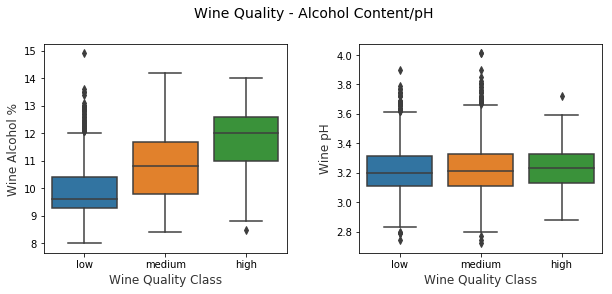

In [27]:
# visualization of above result.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol Content/pH', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_label", y="alcohol",
            data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

# Univariate Analysis
This is perhaps one of the easiest yet a core foundational step in exploratory data analysis. Univariate
analysis involves analyzing data such that at any instance of analysis we are only dealing with one variable or
feature. No relationships or correlations are analyzed among multiple variables.

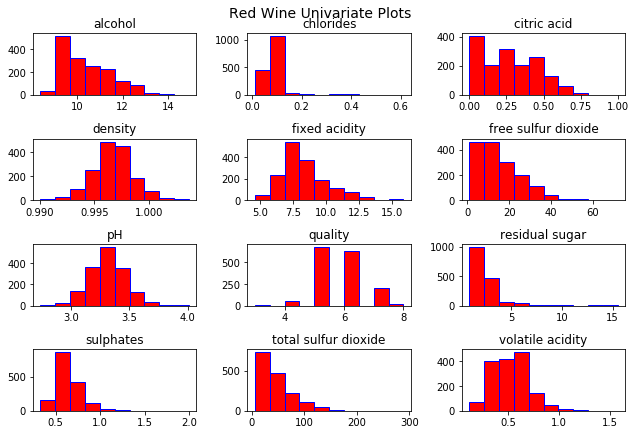

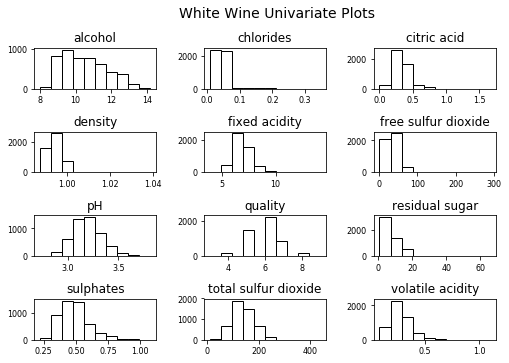

In [28]:
# plotting histograms for univariate analysis.
red_wine.hist(bins=10, color='red', edgecolor='blue', linewidth=1.0,
              xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   
rt = plt.suptitle('Red Wine Univariate Plots', x=0.75, y=1.5, fontsize=14)  

white_wine.hist(bins=10, color='white', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
wt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=14)    

We can draw some insights from above plots about resudal sugar level .


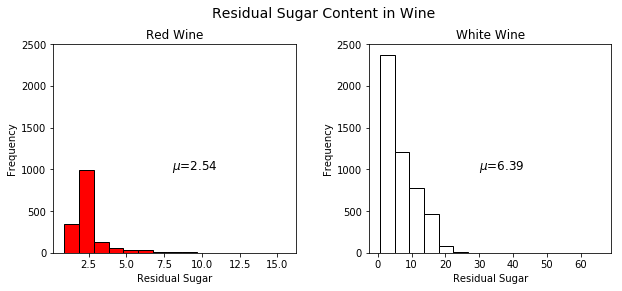

In [29]:
# plotting the residual sugar for more refined view.
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

residual sugar content in white wine
samples seems to be more as compared to red wine samples.

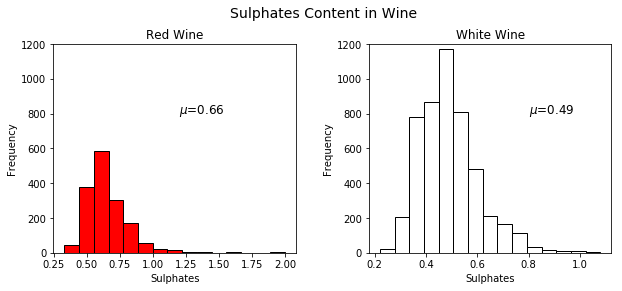

In [30]:
# checking for other insights from the plots.
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                    edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)

We can see the difference between the sulphates content in wine of red and white.

# Multivariate Analysis
Analyzing multiple feature variables and their relationships is what multivariate analysis is all about. We
would want to see if there are any interesting patterns and relationships among the physicochemical
attributes of our wine samples, which might be helpful in our modeling process in the future. One of the best
ways to analyze features is to build a pairwise correlation plot depicting the correlation coefficient between
each pair of features in the dataset.

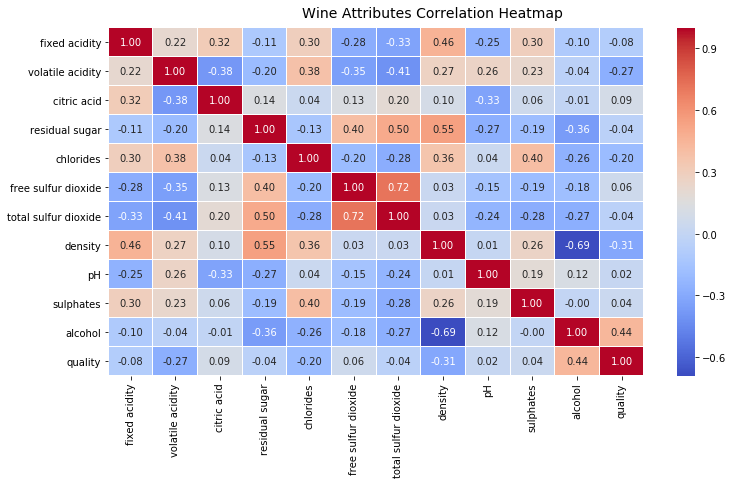

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

we can see a strong negative
correlation between density and alcohol and a strong positive correlation between total and free sulfur
dioxide, which is expected.

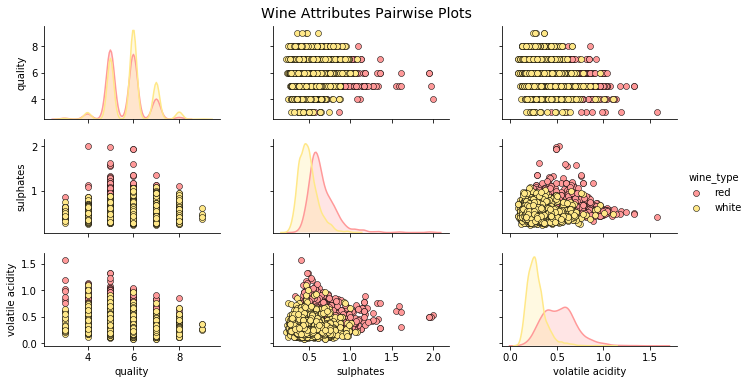

In [32]:
# Generating pairwise plot for some features of the dataset.
cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']
pp = sns.pairplot(wines[cols], hue='wine_type', height=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

we can notice several interesting patterns, which are in alignment with some insights we obtained earlier. These observations include the following:

1. Presence of higher sulphate levels in red wines as compared to white wines
2. Lower sulphate levels in wines with high quality ratings
3. Lower levels of volatile acids in wines with high quality ratings
4. Presence of higher volatile acid levels in red wines as compared to white wines

we can use similar plots on other variables and features to discover more patterns and relationships.

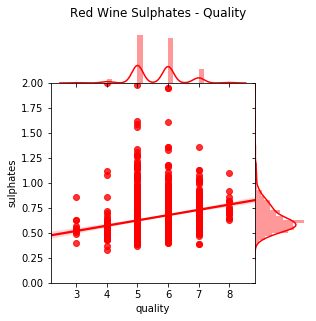

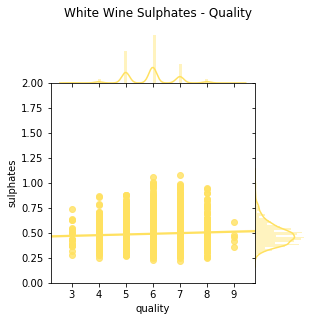

In [33]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
                   kind='reg', ylim=(0, 2),  
                   color='red', space=0, height=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12)

wj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
                   kind='reg', ylim=(0, 2),
                   color='#FFE160', space=0, height=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize=12)

we do see clearly that sulphate levels
for red wine are much higher as compared to the ones in white wine. In this case we have visualized three
features (type, quality, and sulphates) with the help of two plots.

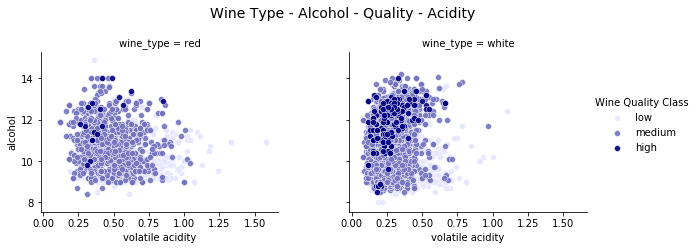

In [34]:
# Fact grid for more drawable insights.
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, height=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

Higher quality wine samples
(depicted by darker shades) have lower levels of volatile acidity and higher levels of alcohol content as
compared to wine samples with medium and low ratings. Besides this, we can also see that volatile acidity
levels are slightly lower in white wine samples as compared to red wine samples.

A nice way to visualize numerical features segmented by groups (categorical variables) is to use box
plots.

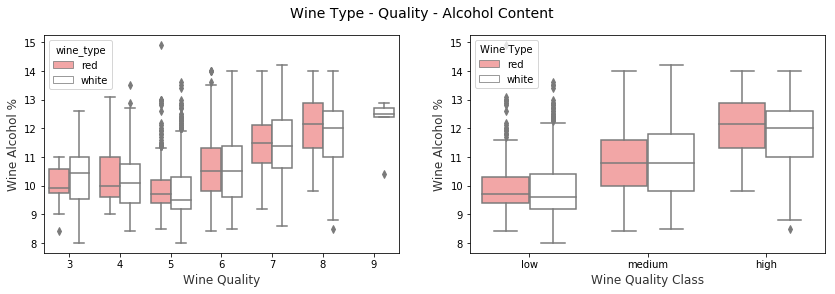

In [35]:
# Box plot for interquartile range and outliers.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

The distribution of alcohol level
for a particular wine quality rating separated by wine types. The box itself depicts the inter-quartile range
and the line inside depicts the median value of alcohol. Whiskers indicate the minimum and maximum
value with outliers often depicted by individual points. We can clearly observe the wine alcohol by volume
distribution has an increasing trend based on higher quality rated wine samples.

### violin plots to visualize distributions of numeric features over categorical features.

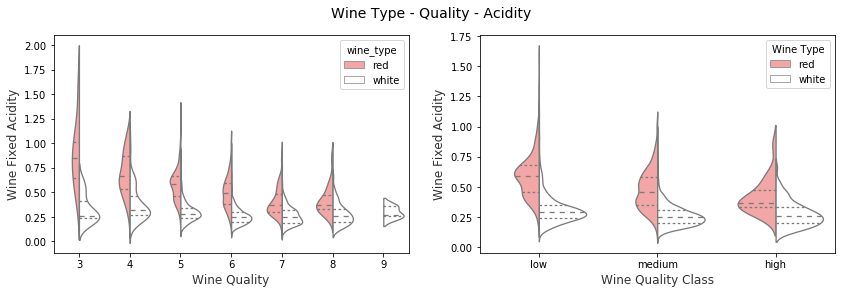

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality_label", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

Each violin plot typically depicts the inter-quartile range with the median which is shown
with dotted lines in this figure. You can also visualize the distribution of data with the density plots where
width depicts frequency. Thus in addition to the information you get from box plots, you can also visualize the
distribution of data with violin plots.

##### It is quite evident that red wine samples have higher acidity as compared to its white wine counterparts.
Also we can see an overall decrease in acidity with higher quality wine for red wine samples but not so much
for white wine samples.

### Reference : prectical Machine learning book

We covered lots of insights from the data now its time to do some predictive analysis.


# Predictive analysis

We would compare different models on this dataset and compare their accuracy for drawing knowledge that is to which algorithm is to be used when.

There can be two types of prediction in this dataset.
1. Prediction of wine_types.
2. Prediction of wine_quality.


In [37]:
# Importing libraries for processing.
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [38]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5,red,low
1,7.2,0.160,0.29,1.0,0.031,40.0,123.0,0.98958,3.12,0.40,12.1,7,white,medium
2,6.5,0.220,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,white,low
3,5.7,0.265,0.28,6.9,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white,medium
4,6.3,0.230,0.21,5.1,0.035,29.0,142.0,0.99420,3.36,0.33,10.1,7,white,medium


In [39]:
X = wines.iloc[:,:-3]

In [40]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
dtypes: float64(11)
memory usage: 558.4 KB


In [42]:
cols = X.columns

In [43]:
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [44]:
for col in cols:
    print(X[col].isnull().value_counts())
    print()

False    6497
Name: fixed acidity, dtype: int64

False    6497
Name: volatile acidity, dtype: int64

False    6497
Name: citric acid, dtype: int64

False    6497
Name: residual sugar, dtype: int64

False    6497
Name: chlorides, dtype: int64

False    6497
Name: free sulfur dioxide, dtype: int64

False    6497
Name: total sulfur dioxide, dtype: int64

False    6497
Name: density, dtype: int64

False    6497
Name: pH, dtype: int64

False    6497
Name: sulphates, dtype: int64

False    6497
Name: alcohol, dtype: int64



We can see that there are no missing values in any columns.


In [45]:
# class labels
wines['wine_type'] = np.where(wines['wine_type']=='red', 1, 0)

In [46]:
y = wines['wine_type']

In [47]:
y.head()
# Here 1 represents red type and o represents white type of wines.

0    1
1    0
2    0
3    0
4    0
Name: wine_type, dtype: int64

In [48]:
# splitting the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [49]:
X_train.shape

(4872, 11)

In [50]:
y_train.shape

(4872,)

In [51]:
# Scaling the features.
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)

X_test_s = ss.transform(X_test)

In [52]:
X_train_s

array([[ 0.13816347, -0.73239668, -0.33296288, ...,  0.43988345,
        -0.60328005, -0.49896465],
       [-0.47660442,  0.49085894,  0.08289574, ...,  0.37743663,
        -0.14078117,  2.43595618],
       [-0.55345041, -0.36542   ,  0.08289574, ...,  0.00275576,
        -0.14078117, -0.66667442],
       ...,
       [ 1.67508319, -0.36542   , -0.12503357, ..., -0.68415917,
        -0.2729237 , -1.00209394],
       [-0.09237449,  0.79667284, -0.19434334, ..., -0.62171236,
        -0.33899497,  1.26198785],
       [-0.86083435, -0.36542   , -0.33296288, ..., -0.05969105,
        -0.14078117, -0.49896465]])

In [53]:
# using Logistic regression classifier .

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs')
lr.fit(X_train_s, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:

y_pred = lr.predict(X_test_s)


In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [56]:
print("Accuracy: " , accuracy_score(y_test,y_pred))


Accuracy:  0.9926153846153846


In [57]:
confusion_matrix(y_test, y_pred)

array([[1221,    4],
       [   8,  392]])

In [58]:
print(classification_report(y_test,y_pred),end ="\n")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1225
           1       0.99      0.98      0.98       400

   micro avg       0.99      0.99      0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [62]:
from sklearn.metrics import roc_curve
def my_plot_roc_curve (y_true, y_prob):
    #
    # Function to plot the ROC curve by computing fpr and tpr as well as save the plot to file
    # Args:
    #   y_true: array of y true label
    #   y_prob: the output of y probability prediction (outcome for predict_proba() function)
    #   filename: the name of the file to be saved
    #   dpi: the resolution of the figure
    # Return:
    #   None
    #
    fpr, tpr, threshold = roc_curve(y_true, y_prob[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [65]:
test_labels = lr.predict_proba(np.array(X_test_s))[:,1]

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
print("roc-auc score:", lr_roc_auc)


roc-auc score: 0.994573469387755


In [66]:
# Trying ensemble methods.
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_s,y_train)
y_pred = rf.predict(X_test_s)
print("Accuracy: ",accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred),end = "\n")

Accuracy:  0.9950769230769231

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      0.99      0.99       400

   micro avg       1.00      1.00      1.00      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



# Trying neural network


In [67]:
from keras.models import Sequential
from keras.layers import Dense

dnn_model = Sequential()
dnn_model.add(Dense(14, activation='relu', input_shape=(11,)))
dnn_model.add(Dense(14, activation='relu'))
dnn_model.add(Dense(14, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [68]:
history = dnn_model.fit(X_train_s, y_train, epochs=100, batch_size=8, 
                            shuffle=True, validation_split=0.1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 4384 samples, validate on 488 samples
Epoch 1/100
 - 1s - loss: 0.1791 - acc: 0.9398 - val_loss: 0.0366 - val_acc: 0.9939
Epoch 2/100
 - 0s - loss: 0.0335 - acc: 0.9938 - val_loss: 0.0449 - val_acc: 0.9898
Epoch 3/100
 - 0s - loss: 0.0283 - acc: 0.9945 - val_loss: 0.0314 - val_acc: 0.9959
Epoch 4/100
 - 0s - loss: 0.0246 - acc: 0.9945 - val_loss: 0.0337 - val_acc: 0.9959
Epoch 5/100
 - 0s - loss: 0.0225 - acc: 0.9950 - val_loss: 0.0305 - val_acc: 0.9959
Epoch 6/100
 - 0s - loss: 0.0194 - acc: 0.9954 - val_loss: 0.0292 - val_acc: 0.9959
Epoch 7/100
 - 0s - loss: 0.0170 - acc: 0.9961 - val_loss: 0.0308 - val_acc: 0.9959
Epoch 8/100
 - 0s - loss: 0.0148 - acc: 0.9966 - val_loss: 0.0328 - val_acc: 0.9959
Epoch 9/100
 - 0s - loss: 0.0134 - acc: 0.9966 - val_loss: 0.0349 - val_acc: 0.9939
Epoch 10/100
 - 0s - loss: 0.0122 - acc: 0.9968 - val_loss: 0.0326 - val_acc: 0.9959
Epoch 11/100
 - 0s - loss: 0.0107 - acc: 0.9973 - val_loss: 0.03

Epoch 91/100
 - 0s - loss: 2.6753e-06 - acc: 1.0000 - val_loss: 0.0546 - val_acc: 0.9939
Epoch 92/100
 - 0s - loss: 2.4396e-06 - acc: 1.0000 - val_loss: 0.0547 - val_acc: 0.9939
Epoch 93/100
 - 0s - loss: 2.2114e-06 - acc: 1.0000 - val_loss: 0.0549 - val_acc: 0.9918
Epoch 94/100
 - 0s - loss: 1.9666e-06 - acc: 1.0000 - val_loss: 0.0549 - val_acc: 0.9939
Epoch 95/100
 - 0s - loss: 1.7513e-06 - acc: 1.0000 - val_loss: 0.0553 - val_acc: 0.9918
Epoch 96/100
 - 0s - loss: 1.5525e-06 - acc: 1.0000 - val_loss: 0.0560 - val_acc: 0.9918
Epoch 97/100
 - 0s - loss: 1.3584e-06 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 0.9918
Epoch 98/100
 - 0s - loss: 1.2236e-06 - acc: 1.0000 - val_loss: 0.0567 - val_acc: 0.9918
Epoch 99/100
 - 0s - loss: 1.0264e-06 - acc: 1.0000 - val_loss: 0.0555 - val_acc: 0.9939
Epoch 100/100
 - 0s - loss: 8.6391e-07 - acc: 1.0000 - val_loss: 0.0554 - val_acc: 0.9939


As we can see the accuracy in this case is greater with neural networks.


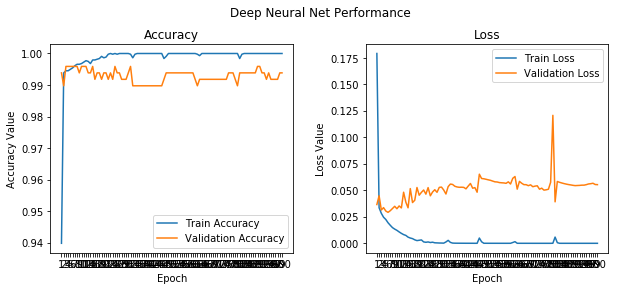

In [69]:
# Evaluating the performanence of the model.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,101))
ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [70]:
dnn_ypred = dnn_model.predict_classes(X_test_s)
print("Accuracy: ",accuracy_score(y_test,dnn_ypred))
print(classification_report(y_test, dnn_ypred),end = "\n")

Accuracy:  0.9938461538461538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      0.99      0.99       400

   micro avg       0.99      0.99      0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
confusion_matrix(y_test, dnn_ypred)

    We saw that accuracies using all the models is comparable so any model can be used , logistic regression is preferred in this case because it is simple to implement and fits this data good.

# Plotting Decision Boundary surface

In [71]:
def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


 # Predicting Wine Quality

The prediction will be among three classes [ 'low ' ,'Medium' , 'High' ].We have considered these three classes because of the less number of some of the quatities. we have merged them into these qualities.

In [72]:
features = wines.iloc[:,:-3]
class_labels = np.array(wines['quality_label'])
label_names = ['low', 'medium', 'high']
feature_names = list(features.columns)
X_train, X_test, y_train, y_test = train_test_split(features, class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(y_train), Counter(y_test))
print('Features:', feature_names)

Counter({'medium': 2736, 'low': 1680, 'high': 131}) Counter({'medium': 1179, 'low': 704, 'high': 67})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [73]:
# Define the scaler 
ss = StandardScaler().fit(X_train)

# Scale the train set
train_SX = ss.transform(X_train)

# Scale the test set
test_SX = ss.transform(X_test)

In [74]:
# Using Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_SX, y_train)

dt_predictions = dt.predict(test_SX)


In [75]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

        high       0.28      0.33      0.30        67
         low       0.67      0.68      0.67       704
      medium       0.78      0.76      0.77      1179

   micro avg       0.72      0.72      0.72      1950
   macro avg       0.57      0.59      0.58      1950
weighted avg       0.72      0.72      0.72      1950



In [76]:
print("Accuracy: ",accuracy_score(y_test,dt_predictions))

Accuracy:  0.7164102564102565


In [77]:
confusion_matrix(y_test,dt_predictions)

array([[ 22,   4,  41],
       [  7, 478, 219],
       [ 50, 232, 897]])

we can see the recall for the high quality
wine samples is pretty bad since a lot of them have been misclassified into medium and low quality ratings.
This is kind of expected since we do not have a lot of training samples for high quality wine if you remember
our training sample sizes from earlier

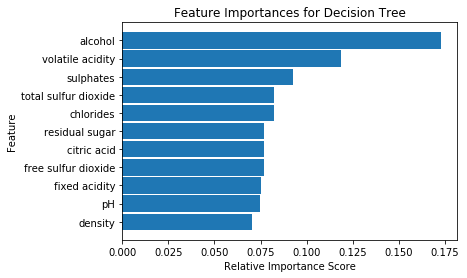

In [78]:
# Viewing Feature Importances of Decision Trees.
dt_feature_importances = dt.feature_importances_
dt_feature_names, dt_feature_scores = zip(*sorted(zip(feature_names, dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(dt_feature_names)))
plt.barh(y_position, dt_feature_scores, height=0.9, align='center')
plt.yticks(y_position , dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

Alcohol and volatile acidity occupy the top two ranks and total sulfur dioxide
seems to be one of the most important features for classifying both wine type and quality

The class variable is what we are trying to predict, i.e. wine quality being low, medium, or high and value
determines the total number of samples at each class present in the current decision node at each instance.
The gini parameter is basically the criterion which is used to determine and measure the quality of the split
at each decision node. Best splits can be determined by metrics like gini impurity\gini index or information
gain.

In [79]:
# Using Ensemble Method 
from sklearn.model_selection import GridSearchCV

param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,
                       scoring='accuracy')
clf.fit(train_SX, y_train)
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [80]:
rf = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=42)
rf.fit(train_SX, y_train)

rf_predictions = rf.predict(test_SX)


In [81]:
print("Accuracy: ",accuracy_score(y_test,rf_predictions))

Accuracy:  0.801025641025641


In [82]:
print(classification_report(y_test,rf_predictions),end = "\n")

              precision    recall  f1-score   support

        high       0.83      0.30      0.44        67
         low       0.77      0.73      0.75       704
      medium       0.81      0.87      0.84      1179

   micro avg       0.80      0.80      0.80      1950
   macro avg       0.81      0.63      0.68      1950
weighted avg       0.80      0.80      0.80      1950



We obtained an accuracy of 80% which is better than Decision tree

In [83]:
# Using Extra tree classifier.
from sklearn.tree import ExtraTreeClassifier
etc =  ExtraTreeClassifier()
etc.fit(train_SX, y_train)

etc_pred = etc.predict(test_SX)


In [84]:
print("Accuracy: ",accuracy_score(y_test,etc_pred))

Accuracy:  0.7235897435897436


In [85]:
print(classification_report(y_test,etc_pred),end = "\n")

              precision    recall  f1-score   support

        high       0.44      0.36      0.39        67
         low       0.67      0.65      0.66       704
      medium       0.77      0.79      0.78      1179

   micro avg       0.72      0.72      0.72      1950
   macro avg       0.62      0.60      0.61      1950
weighted avg       0.72      0.72      0.72      1950



 Random Forest is much better than the tree models.

In [86]:
# Using xgboost which is Xtreme boosting method.
import xgboost as xgb
xgb_model = xgb.XGBClassifier(seed=42)
xgb_model.fit(train_SX, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [87]:
xgb_predictions = xgb_model.predict(test_SX)
print("Accuracy: ",accuracy_score(y_test,xgb_predictions))
print(classification_report(y_test,xgb_predictions),end = "\n")

Accuracy:  0.7410256410256411
              precision    recall  f1-score   support

        high       1.00      0.06      0.11        67
         low       0.71      0.62      0.67       704
      medium       0.75      0.85      0.80      1179

   micro avg       0.74      0.74      0.74      1950
   macro avg       0.82      0.51      0.53      1950
weighted avg       0.75      0.74      0.73      1950



XGboost also didn't performed very well than random forest model.

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import auc
def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()




Plotting a binary classifier’s ROC curve is easy, but what do you do when you are dealing with a
multi-class classifier (3-class in our case)? There are several ways to do this. You would need to binarize the
output. Once this operation is executed, you can plot one ROC curve per class label. Besides this, you can
also follow two aggregation metrics for computing the average ROC measures. Micro-averaging involves
plotting an ROC curve over the entire prediction space by considering each predicted element as a binary
prediction. Hence equal weight is given to each prediction classification decision. Macro-averaging involves
giving equal weight to each class label when averaging. Our model_evaluation_utils module has a nifty
customizable function plot_model_roc_curve(...), which can help plot multi-class classifier ROC curves
with both micro- and macro-averaging capabilities

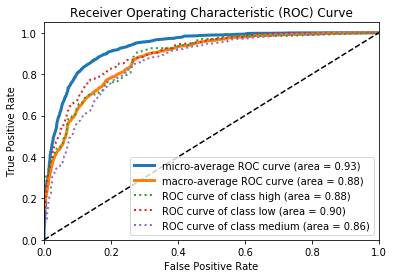

In [91]:
plot_model_roc_curve(rf, test_SX, y_test)

In this we explored the various components of Explotary data analysis and Model building and Evaluating Parameters.
In our Example the RandomForest Model performed better than the other bagging and boosting methods.
The results are drawn and discussed in the notebook and these aspects are important for model performanence and analysis.